In [26]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import model_assessment
import pickle

In [2]:
data = np.load('../train_set.npz')
refls = data['output_rfl']
wv = data['output_wv']
fids = data['output_idx']

values, counts = np.unique(fids, return_counts=True)
scenes = np.split(refls, 946)
wv_by_scene = np.split(wv, 946)
scenes = np.array(scenes)
wv_by_scene = np.array(wv_by_scene)

print(scenes.shape)
print(wv_by_scene.shape)

(946, 1242, 285)
(946, 1242)


In [21]:
X_idx, y_idx = np.arange(10), np.arange(10)
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.3, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


print('X train: ', X_train_idx)
print('y train: ', y_train_idx)
print('X test: ', X_test_idx)
print('y test : ', y_test_idx)

X train:  [2 4 1 5 3 9 0]
y train:  [2 4 1 5 3 9 0]
X test:  [7 8 6]
y test :  [7 8 6]


In [23]:
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [28]:
pickle.dump(rf, open('../ss_rf.pkl', 'wb'))

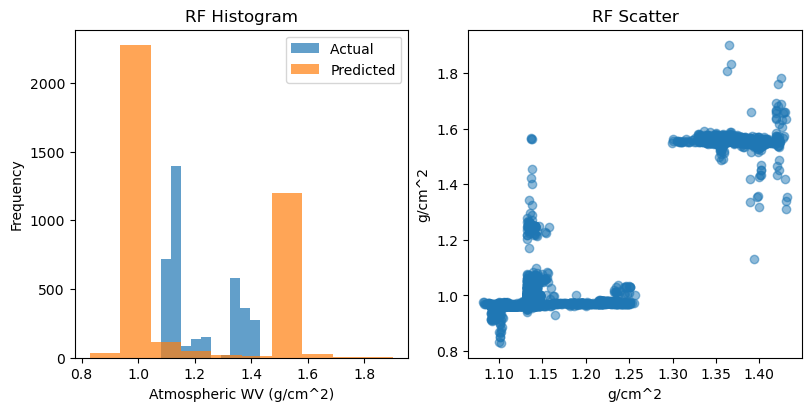

In [30]:
model_assessment.plot_hist_and_scatter(y_test, y_pred, 'RF Histogram', 'RF Scatter')

In [31]:
y_test.shape

(3726,)

In [32]:
y_pred.shape

(3726,)

In [33]:
X_train.shape

(8694, 285)

In [34]:
y_train.shape

(8694,)

In [35]:
X_test.shape

(3726, 285)